<a href="https://colab.research.google.com/github/GitSantiagopf/DiabetesPrediction/blob/main/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, Normalizer, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings("ignore")


In [132]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Not have a missing values

In [135]:
#Create a class for scatter plot visualization.
class ScatterPlot:
    def __init__(self, x_data, y_data, color):
        self.x_data = x_data
        self.y_data = y_data
        self.color = color

    def create_plot(self, title, x_label, y_label):
        plt.scatter(x=self.x_data, y=self.y_data, color=self.color)
        plt.title(title)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.grid(axis='both', alpha=0.75)
        plt.show()

#Create a class for hist plot visualization

class HistPlot:
    def __init__(self, x_data):
        self.x_data = x_data

    def create_plot(self, title, x_label, y_label):
        plt.figure(figsize = (8,4))
        plt.hist(x=self.x_data, linewidth = 2, edgecolor = 'black')
        plt.title(title)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.grid(axis='both', alpha=0.75)
        plt.show()

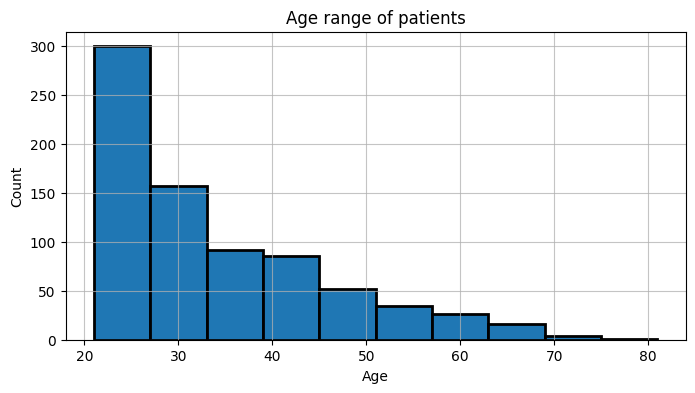

In [136]:
agerange = HistPlot(df['Age'])
agerange.create_plot('Age range of patients', 'Age', 'Count')

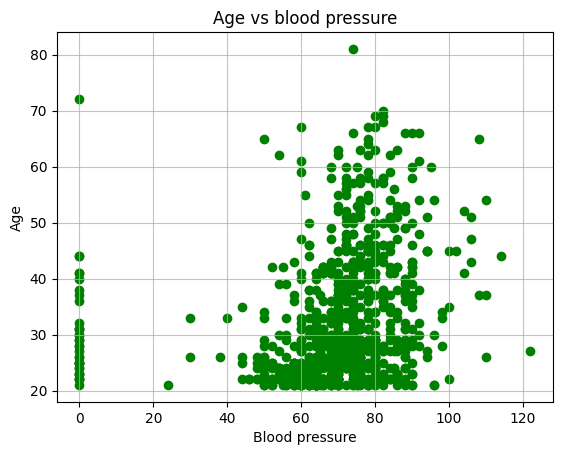

In [137]:
agevsblood = ScatterPlot(df['BloodPressure'], df['Age'], 'green')
agevsblood.create_plot('Age vs blood pressure', 'Blood pressure', 'Age')

Blood pressure 0 is not possible

In [138]:
data = df
print("Patients with blood pressure\n", data.shape) # Rows x Columns

Patients with blood pressure
 (768, 9)


In [139]:
#Separate the dataset
diabetic = data[data["Outcome"] == 1]
notdiabetic = data[data["Outcome"] == 0]

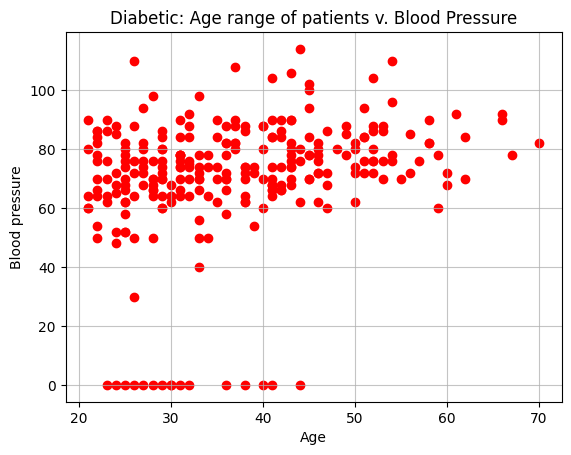

In [140]:
Diabeticagerange = ScatterPlot(diabetic['Age'], diabetic['BloodPressure'], 'red')
Diabeticagerange.create_plot('Diabetic: Age range of patients v. Blood Pressure','Age' , 'Blood pressure') 

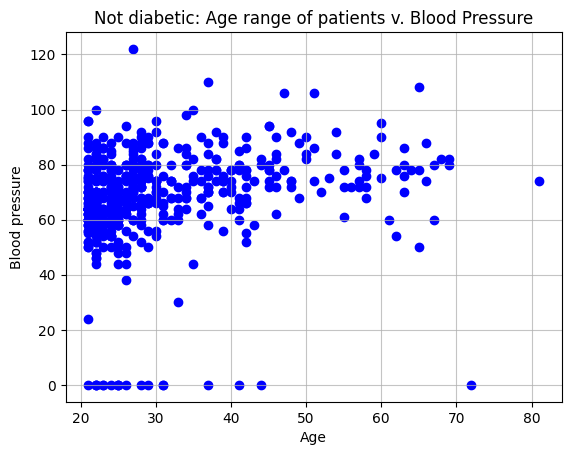

In [141]:
Notdiabeticagerange = ScatterPlot(notdiabetic['Age'], notdiabetic['BloodPressure'], 'blue')
Notdiabeticagerange.create_plot('Not diabetic: Age range of patients v. Blood Pressure','Age' , 'Blood pressure')

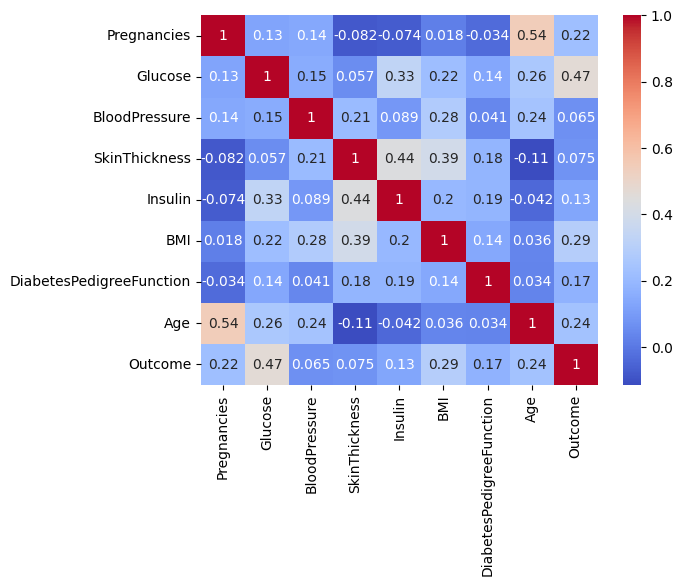

In [142]:
# Visualize correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Create ML model



In [143]:
# Create a StandardScaler object
scaler = MaxAbsScaler()

# Split into features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Model Logistic Regression

In [144]:
# Set the hyperparameter grid
param_gridLR = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 10, 100],
}

# Create logistic regression model
logreg = LogisticRegression(max_iter = 500, solver='liblinear')

# Create GridSearchCV object
grid_searchLR = GridSearchCV(logreg, param_grid=param_gridLR, cv=5)

# Fit the GridSearchCV object to the training data
grid_searchLR.fit(X_train, y_train)

# Evaluate the best model on the test data
score = grid_searchLR.score(X_test, y_test)

predictions = grid_searchLR.best_estimator_.predict(X_test)

print(f'Test accuracy: {score: .2f}')

Test accuracy:  0.75


Model RidgeClassifier

In [145]:
# Set the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(RidgeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
score_rc = best_model.score(X_test, y_test)
print(f'Test accuracy: {score_rc:.2f}')

Test accuracy: 0.75


Model Kneighbors

In [146]:
# Set the hyperparameter grid
param_grid = {'n_neighbors': range(1, 101)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
score_kn = best_model.score(X_test, y_test)
print(f'Test accuracy: {score_kn:.2f}')

Test accuracy: 0.73


Model DecisionTreeClassifier

In [147]:
# Set the hyperparameter grid
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 8, 16],
}

treemodel = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(treemodel, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
scoretree = best_model.score(X_test, y_test)
print(f'Test accuracy: {scoretree:.2f}')

Test accuracy: 0.77


Model RandomForestClassifier

In [148]:
# Set the hyperparameter grid
param_distribs = {
    'n_estimators': randint(low=50, high=200),
    'max_depth': randint(low=2, high=10),
    'min_samples_split': randint(low=2, high=10)
}

rnd_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_distribs,
                                n_iter=10, cv=5, random_state=42)
rnd_search.fit(X_train, y_train)

best_model = rnd_search.best_estimator_
score_rf = best_model.score(X_test, y_test)
print(f'Test accuracy: {score_rf:.2f}')

Test accuracy: 0.75


Model GrandienBoostingClassifier

In [149]:
# Set the hyperparameter grid
param_distribs = {
    'n_estimators': randint(low=50, high=200),
    'max_depth': randint(low=2, high=10),
    'min_samples_split': randint(low=2, high=10),
    'learning_rate': [0.01, 0.1, 1.0]
}

rnd_search = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), param_distributions=param_distribs,
                                n_iter=10, cv=5, random_state=42)
rnd_search.fit(X_train, y_train)

best_model = rnd_search.best_estimator_
score_gb = best_model.score(X_test, y_test)
print(f'Test accuracy: {score_gb:.2f}')


Test accuracy: 0.70


Model Decision Tree Classifier

In [150]:
# Set the hyperparameter grid
param_distribs = {
    'n_estimators': randint(low=50, high=200),
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0],
    'base_estimator': [DecisionTreeClassifier(max_depth=5), DecisionTreeClassifier(max_depth=10)]
}

rnd_search = RandomizedSearchCV(BaggingClassifier(random_state=42), param_distributions=param_distribs,
                                n_iter=10, cv=5, random_state=42)
rnd_search.fit(X_train, y_train)

best_model = rnd_search.best_estimator_
score_bc = best_model.score(X_test, y_test)
print(f'Test accuracy: {score_bc:.2f}')


Test accuracy: 0.76


Model SVC

In [151]:
# Set the hyperparameter grid
param_distribs = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(uniform(0.01, 0.5).rvs(10)),
    'degree': randint(1, 10),
}

rnd_search = RandomizedSearchCV(SVC(random_state=42), param_distributions=param_distribs,
                                n_iter=10, cv=5, random_state=42)
rnd_search.fit(X_train, y_train)

best_model = rnd_search.best_estimator_
score_svm = best_model.score(X_test, y_test)
print(f'Test accuracy: {score_svm:.2f}')

Test accuracy: 0.75


Model GaussianNB

In [152]:
# Set the hyperparameter grid
param_distribs = {
    'var_smoothing': uniform(1e-9, 1e-7),
}

rnd_search = RandomizedSearchCV(GaussianNB(), param_distributions=param_distribs,
                                n_iter=10, cv=5, random_state=42)
rnd_search.fit(X_train, y_train)

best_model = rnd_search.best_estimator_
score_nb = best_model.score(X_test, y_test)
print(f'Test accuracy: {score_nb:.2f}')

Test accuracy: 0.77


ensemble voting classifier

In [153]:
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
nb = GaussianNB()
svm = SVC(random_state=42)

voting_clf = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('dt', dt), ('rf', rf), ('nb', nb), ('svm', svm)], voting='hard')

voting_clf.fit(X_train, y_train)

score_voting = voting_clf.score(X_test, y_test)
print(f'Test accuracy: {score_voting:.2f}')


Test accuracy: 0.78


Stacking Ensemble

In [154]:
estimators = [
    ('lr', LogisticRegression(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('nb', GaussianNB()),
    ('svm', SVC(random_state=42))
]

stacked_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=42))

stacked_clf.fit(X_train, y_train)

score_stacked = stacked_clf.score(X_test, y_test)
print(f'Test accuracy: {score_stacked:.2f}')


Test accuracy: 0.77


Ensemble by *averaging*


In [155]:
models = [
    LogisticRegression(random_state=42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GaussianNB(),
    SVC(random_state=42, probability=True)
]

model_preds = []
for model in models:
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_test)
    model_preds.append(preds)

avg_preds = sum(model_preds) / len(model_preds)

final_preds = avg_preds.argmax(axis=1)

accuracy = (final_preds == y_test).mean()
print(f'Test accuracy: {accuracy:.1f}')

Test accuracy: 0.8
